In [1]:
import pandas as pd
import os
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/home/bcthakredata/mlops_zoomcamp/week1/data/')

In [4]:
def read_parquet_file(filename):
    """
    
    
    """
    
    df = pd.read_parquet(filename)
    
    df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
    df['duration'] = df.duration.apply(lambda td : td.total_seconds()/60)
    
    df = df[((df.duration >= 1) & (df.duration <=60))]
    
    categorical = ['PULocationID','DOLocationID']
        
    df[categorical] = df[categorical].astype(str)
    
    return df

In [9]:
df_train = read_parquet_file('green_tripdata_2022-01.parquet')
df_val = read_parquet_file('green_tripdata_2022-02.parquet')

In [10]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [11]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

8.193832546681532

In [ ]:
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(X_train,y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/home/bcthakredata/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bcthakredata/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


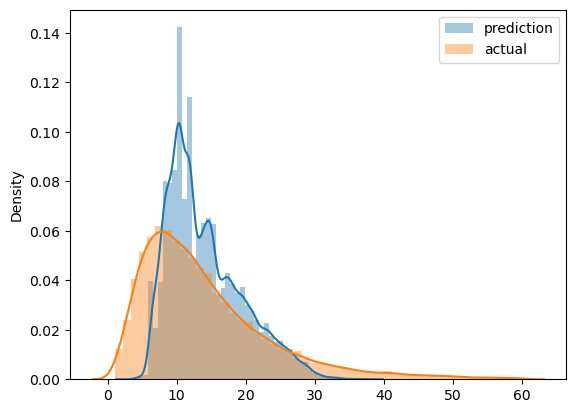

In [26]:
sns.distplot(y_pred,label='prediction')
sns.distplot(y_train,label='actual')
plt.legend()

In [28]:
mean_squared_error(y_train,y_pred,squared=False)

7.7357935521525985